Programming Exerise 1:Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

2 linear regression with one varible


In [2]:
datafile='ex1data1.txt'

In [3]:
cols=np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #read in comma separated data
# From the usual "X" matrix and "y " vector
X=np.transpose(np.array(cols[:-1]))
y=np.transpose(np.array(cols[-1:]))
m=y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X=np.insert(X,0,1,axis=1)

2.1 plotting the Data

Text(0.5, 0, 'Population of City in 10,000s')

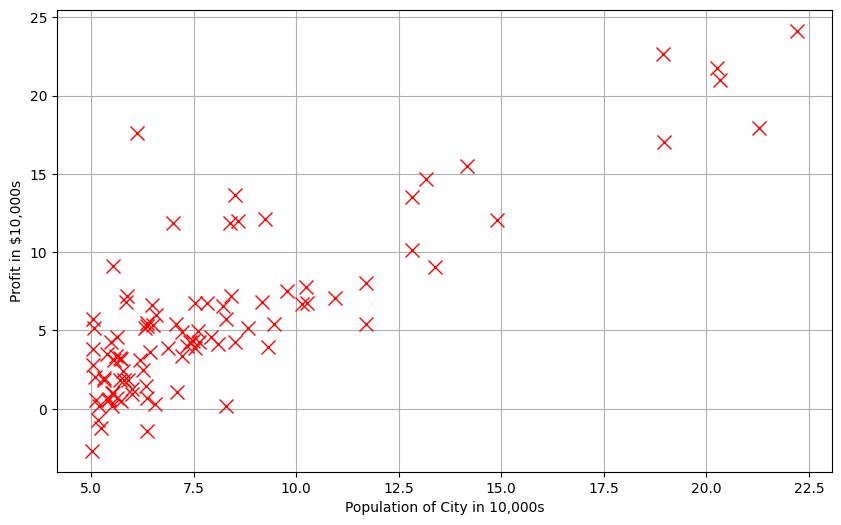

In [5]:
#plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

2.2 Gradient Descent


In [6]:
iterations=1500
alpha=0.01

In [9]:
def h(theta,X): # Linear hypothesis function
    return np.dot(X,theta)

def computeCost(X,y,mytheta): # cost function
    """
    theta_start is an n -dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is vector with m- rows and 1 column
    """
    # note to self: *.shape is (row,columns)
    return (1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y))[0][0] # Extract the single value from the result

# test that running computeCost with 0's as theta returns 32.07:

initial_theta=np.zeros(X.shape[1])
print(computeCost(X,y,initial_theta))

32.07273387745566


In [12]:
#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    # Use range instead of xrange
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        # Pass y to computeCost
        jvec.append(computeCost(X, y, theta))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)): # Use range instead of xrange
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

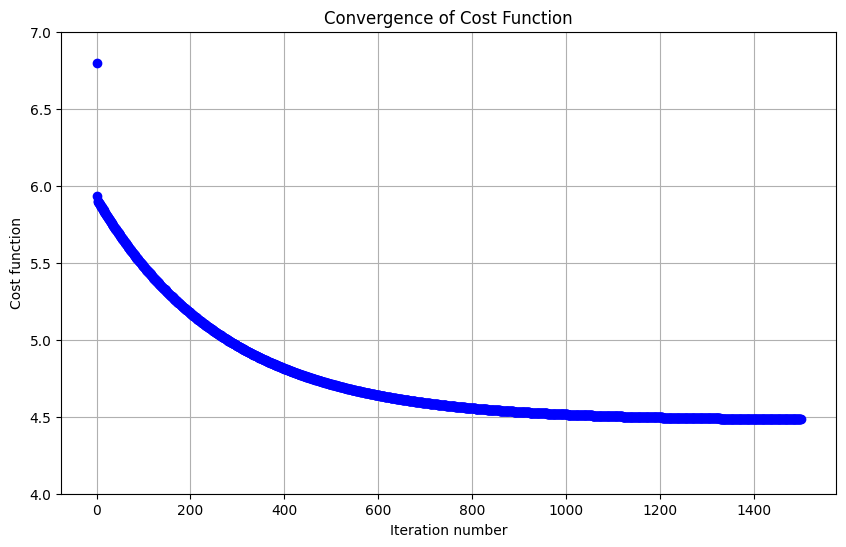

In [13]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

<ipython-input-14-f1427c119a2e>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))


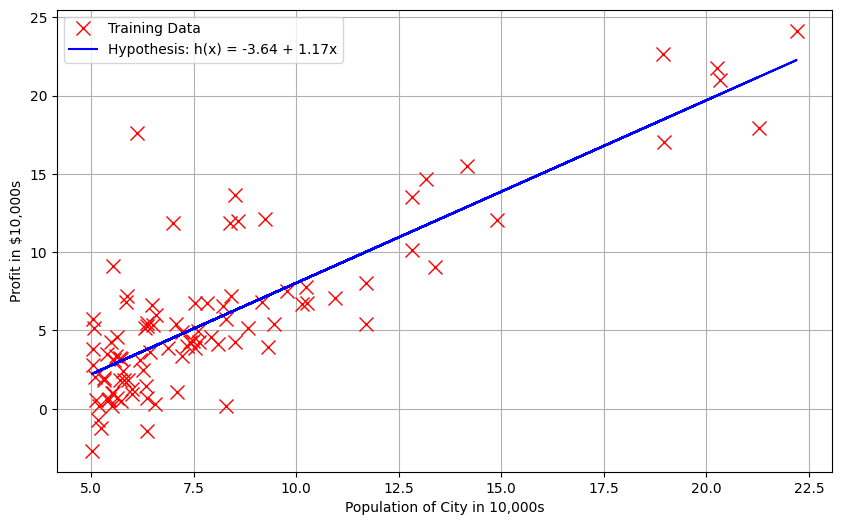

In [14]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

2.4 Visualizing J(theta)

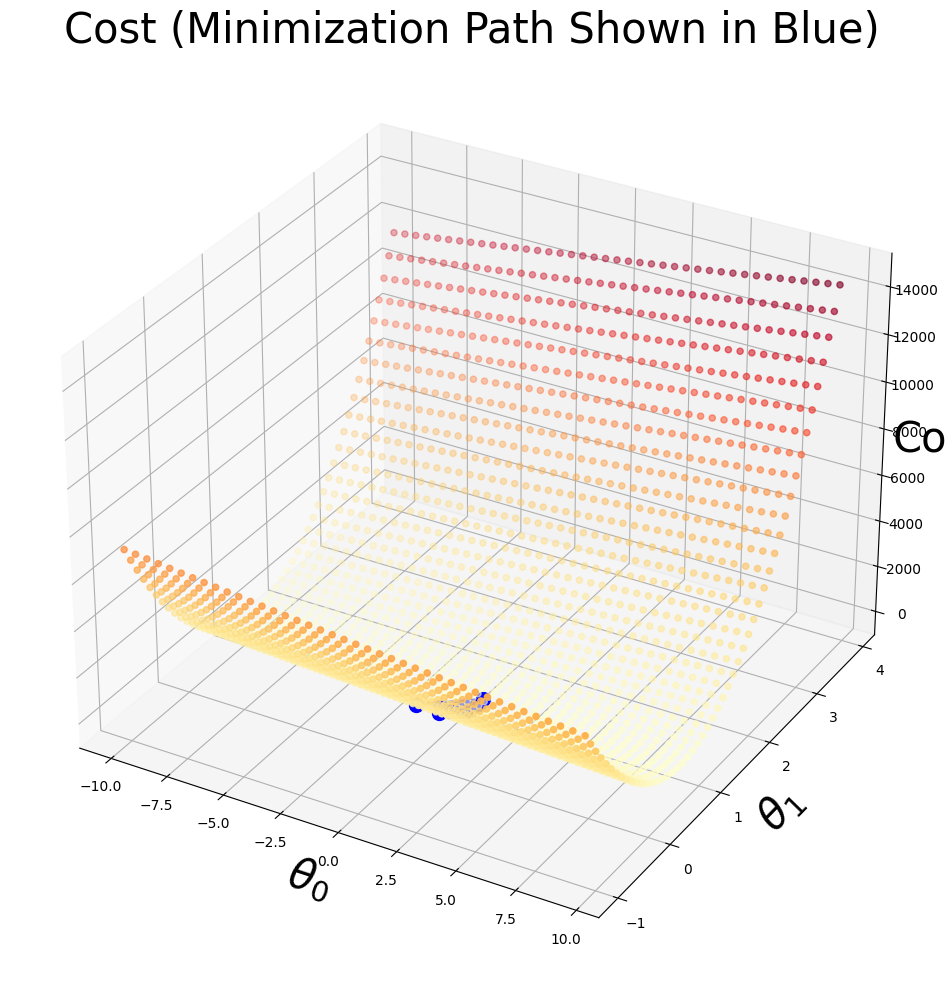

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define your computeCost function
def computeCost(theta, X, y):
    m = len(y)
    predictions = X @ theta
    sqrErrors = (predictions - y) ** 2
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Assuming X and y are defined as follows
X = np.array([[1, x1] for x1 in range(97)])  # Example data
y = np.array([[y1] for y1 in range(97)])  # Example data

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

xvals = np.arange(-10, 10, 0.5)
yvals = np.arange(-1, 4, 0.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        theta = np.array([[david], [kaleko]])
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(theta, X, y))

scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap('YlOrRd'))

ax.set_xlabel(r'$\theta_0$', fontsize=30)
ax.set_ylabel(r'$\theta_1$', fontsize=30)
ax.set_zlabel('Cost', fontsize=30)
ax.set_title('Cost (Minimization Path Shown in Blue)', fontsize=30)

# Plot the path of theta values
thetahistory = [np.random.rand(2) for _ in range(10)]  # Replace with actual theta history
thetahistory = np.array(thetahistory)  # Ensure it is a NumPy array
jvec = [computeCost(np.array([[th[0]], [th[1]]]), X, y) for th in thetahistory]

# Ensure the path is visible
ax.plot(thetahistory[:, 0], thetahistory[:, 1], jvec, 'bo-', linewidth=2, markersize=10)

plt.show()


3. Linear Regression with multiple variables


In [23]:
datafile = 'ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

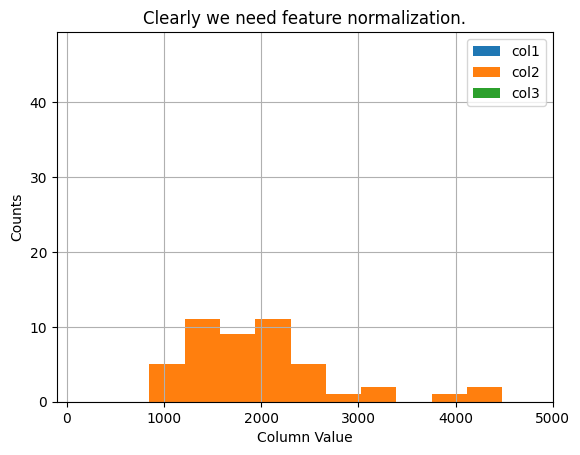

In [24]:
#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [26]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]): # Use range instead of xrange
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

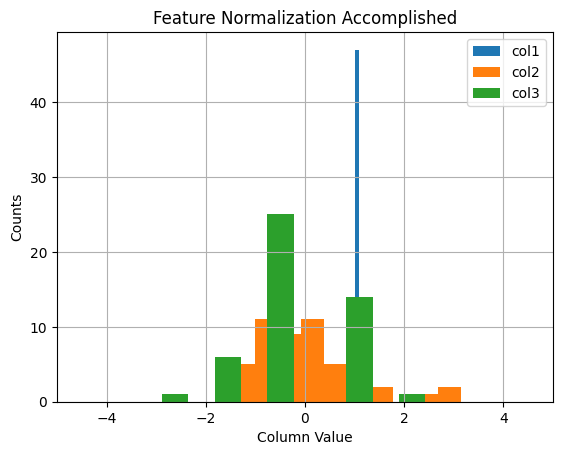

In [27]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [34]:
import numpy as np
import matplotlib.pyplot as plt

datafile = 'ex1data2.txt'
# Read into the data file
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1, 2), unpack=True)  # Read in comma separated data
# Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size  # number of training examples
# Insert the usual column of 1's into the "X" matrix
X = np.insert(X, 0, 1, axis=1)


In [35]:
# Feature normalizing the columns (subtract mean, divide by standard deviation)
# Store the mean and std for later use
# Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(1, Xnorm.shape[1]):  # Skip the first column (intercept)
    mean = np.mean(Xnorm[:, icol])
    std = np.std(Xnorm[:, icol])
    stored_feature_means.append(mean)
    stored_feature_stds.append(std)
    Xnorm[:, icol] = (Xnorm[:, icol] - mean) / std


In [36]:
def computeCost(theta, X, y):
    m = len(y)
    predictions = X @ theta
    sqrErrors = (predictions - y) ** 2
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def descendGradient(X, theta, y, alpha=0.01, num_iters=1500):
    m = len(y)
    J_history = []
    theta_history = []

    for i in range(num_iters):
        predictions = X @ theta
        errors = predictions - y
        theta = theta - (alpha / m) * (X.T @ errors)
        J_history.append(computeCost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, theta_history, J_history


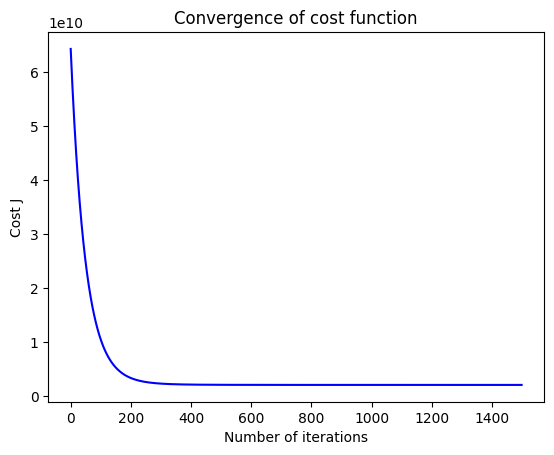

In [37]:
initial_theta = np.zeros((Xnorm.shape[1], 1))
theta, thetahistory, jvec = descendGradient(Xnorm, initial_theta, y)

# Plot convergence of cost function
def plotConvergence(jvec):
    plt.plot(range(len(jvec)), jvec, 'b-')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Convergence of cost function')
    plt.show()

plotConvergence(jvec)


In [42]:
ytestscaled = [(ytest[x]-stored_feature_means[x])/stored_feature_stds[x] for x in range(len(ytest))] # Start indexing from 0 to match stored_feature lists
ytestscaled.insert(0,1)
print("${:.2f}".format(float(h(theta,ytestscaled)))) # Assuming 'h' is defined elsewhere to calculate the price

$293098.47


<ipython-input-42-24c39130ce07>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("${:.2f}".format(float(h(theta,ytestscaled)))) # Assuming 'h' is defined elsewhere to calculate the price


In [43]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [45]:
print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print("$%0.2f" % float(h(normEqtn(X,y),[1,1650,3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46


<ipython-input-45-c1e06454635a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("$%0.2f" % float(h(normEqtn(X,y),[1,1650,3])))
